<center><h1>Exercise on Polygenic Scoring</h1>
<b>Human Genetics of complex traits</b></br></br>
<i><small>Ana Arruda (ana.arruda@helmholtz-muenchen.de) - Ozvan Bocher (ozvan.bocher@helmholtz-muenchen.de)</i></small>
</center>

# Summary
In this exercise, we will apply two polygenic scores to samples from the 1000 Genomes project: **a polygenic risk score for Coronary Artery Disease (CAD)** and a **polygenic score for levels of the MEP1B protein**. We will perform the following steps:
- Compute the two scores by hand in R and using Plink
- See how well these two scores predict the traits in question
- Study the influence of ethnicity, and adjust for it
- Examine the polygenicity of these two traits through a genome-wide association.

During this practical, we will mostly use the R software but we will as well make use of Plink, a very common tool for a wide range of genetic analyses.
There are some optional exercises in the practical that you might want to do if you progress fast.
Multiple questions are asked through this notebook. The answers are provided in hidden cells but please try to answer the questions by yourself to get the most of this session.

Use `gc()` from time to time to free up memory.

# Downloading the data and installing libraries
We need following data:


*   Polygenic risk score (PGS000337) for CAD
*   Polygenic risk score for MET1B
*   Genetic data


All data is in the following location: https://www.dropbox.com/scl/fo/h0gwms5yhgd44od5fm11s/h?dl=0&rlkey=7ksbrzt4xyeoxkoq2kwrc4omu. We will download the data in the corresponding exercise and unzip it when necessary.

We will start by downloading the packages that we will need in R. We need `R.utils` (this step will need a few minutes to run) and `manqq`.
We will use the classical R libraries to import and export files. Nevertheless, be aware that genetic files can be large and this can take a lot of memory and computation time in R. The library `data.table` can be useful to answer this issue and codes with how to use this library will be provided throughout this notebook.

In [ ]:
install.packages('R.utils')
devtools::install_github("hmgu-itg/man_qq_annotate")
install.packages('qqman')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’





jsonlite   (1.8.7  -> 1.8.8  ) [CRAN]
findpython (NA     -> 1.0.8  ) [CRAN]
openssl    (2.0.6  -> 2.1.1  ) [CRAN]
curl       (5.0.2  -> 5.2.0  ) [CRAN]
argparse   (NA     -> 2.2.2  ) [CRAN]
zoo        (NA     -> 1.8-12 ) [CRAN]
assertthat (NA     -> 0.2.1  ) [CRAN]
data.table (1.14.8 -> 1.14.10) [CRAN]
rjson      (NA     -> 0.2.21 ) [CRAN]


Installing 9 packages: jsonlite, findpython, openssl, curl, argparse, zoo, assertthat, data.table, rjson

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpq9nZof/remotesc752f839ba/hmgu-itg-man_qq_annotate-546fe4f/DESCRIPTION’ ... OK
* preparing ‘manqq’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘manqq_0.2.4.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘calibrate’




Now, let's install the `plink` software:

In [ ]:
cat(system("wget https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20210606.zip", intern=T), sep="\n")
cat(system("unzip plink_linux_x86_64_20210606.zip", intern=T), sep="\n")
cat(system("rm prettify toy.* LICENSE", intern=T), sep="\n")
cat(system('./plink --help', intern=T), sep="\n")


Archive:  plink_linux_x86_64_20210606.zip
  inflating: plink                   
  inflating: LICENSE                 
  inflating: toy.ped                 
  inflating: toy.map                 
  inflating: prettify                

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3

In the command line flag definitions that follow,
  * <angle brackets> denote a required parameter, where the text between the
    angle brackets describes its nature.
  * ['square brackets + single-quotes'] denotes an optional modifier.  Use the
    EXACT text in the quotes.
  * [{bar|separated|braced|bracketed|values}] denotes a collection of mutually
    exclusive optional modifiers (again, the exact text must be used).  When
    there are no outer square brackets, one of the choices must be selected.
  * ['quoted_text='<description of value>] denotes an optional modifier that
    must begin with 

# **PGS**
## Importing scores
As previously mentioned, we will study two PGS, one for CAD and the other for the MEP1B protein levels. These scores were computed on large studies and are publicly available. We will start by importing the summary statistics for the variants used to construct the two scores.


**Exercise 1:**
- Import the data from the dropbox: https://www.dropbox.com/s/4083718iyo46nw2/liftedover.CAD.score?dl=1 for CAD and https://www.dropbox.com/s/o71gg622t2vnjqu/MEP1B.gilly.prs.txt?dl=1 for MEP1B. Use `read.table()` to do so.
- If needed, create an `id` column corresponding to chr`chromosome_number`:`position`
- For both traits, export a file containing the columns `id`, `effect_allele` and `effect_weight` (rename the columns of the file if necessary). These files should be name `CAD.score` and `MEP1B.score`.

**Question 1:** How many variants compose the two scores ?

In [ ]:
#@title Scores importation
cadscore = read.table("https://www.dropbox.com/s/4083718iyo46nw2/liftedover.CAD.score?dl=1")
mepscore=read.table("https://www.dropbox.com/s/o71gg622t2vnjqu/MEP1B.gilly.prs.txt?dl=1", header = TRUE)
head(cadscore)
head(mepscore)

,V1,V2,V3,V4,V5,V6
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,1023851,A,0.0113215,1:959231:G:A,chr1:1023851
2,1,1184478,T,-0.0165875,1:1119858:C:T,chr1:1184478
3,1,1186644,C,0.0135431,1:1122024:T:C,chr1:1186644
4,1,1219478,T,-0.0243073,1:1154858:C:T,chr1:1219478
5,1,1236037,T,-0.0126844,1:1171417:C:T,chr1:1236037
6,1,1274972,G,-0.0193357,1:1210352:A:G,chr1:1274972


,chr,pos,A1,A2,effect
,<int>,<int>,<chr>,<chr>,<dbl>
1,18,32038169,T,C,-0.2891709
2,18,32067215,C,T,0.4230704
3,18,32208550,G,C,-0.6470447
4,18,32224458,T,C,-0.6871607
5,18,32224900,A,T,-1.0701130
6,18,32317264,C,G,-0.5560340


In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title Get id column
colnames(cadscore) <- c("chr_name", "chr_position", "effect_allele", "effect_weight", "id_alleles", "id")
head(cadscore)
mepscore$id <- paste0("chr", mepscore$chr, ":", mepscore$pos)
head(mepscore)

,chr_name,chr_position,effect_allele,effect_weight,id_alleles,id
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,1023851,A,0.0113215,1:959231:G:A,chr1:1023851
2,1,1184478,T,-0.0165875,1:1119858:C:T,chr1:1184478
3,1,1186644,C,0.0135431,1:1122024:T:C,chr1:1186644
4,1,1219478,T,-0.0243073,1:1154858:C:T,chr1:1219478
5,1,1236037,T,-0.0126844,1:1171417:C:T,chr1:1236037
6,1,1274972,G,-0.0193357,1:1210352:A:G,chr1:1274972


,chr,pos,A1,A2,effect,id
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>
1,18,32038169,T,C,-0.2891709,chr18:32038169
2,18,32067215,C,T,0.4230704,chr18:32067215
3,18,32208550,G,C,-0.6470447,chr18:32208550
4,18,32224458,T,C,-0.6871607,chr18:32224458
5,18,32224900,A,T,-1.0701130,chr18:32224900
6,18,32317264,C,G,-0.5560340,chr18:32317264


In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title Export the files
write.table(cadscore[,c("id", "effect_allele", "effect_weight")], "CAD.score", sep="\t", col.names=F, quote=F, row.names = F)
write.table(mepscore[,c("id", "A1", "effect")], "MEP1B.score", sep="\t", col.names=F, quote=F, row.names = F)

In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title Answer question 1
cat("CAD PGS is composed of", nrow(cadscore), "variants\n")
cat("MEP1B PGS is composed of", nrow(mepscore), "variants\n")

CAD PGS is composed of 75001 variants
MEP1B PGS is composed of 7 variants


In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title **Optional** Alternative using the data.table library
cadscore = fread("https://www.dropbox.com/s/4083718iyo46nw2/liftedover.CAD.score?dl=1")
cadscore[,id:=paste0("chr", V1, ":", V2)]
cadscore = cadscore[, .(chr_name=V1, chr_position=V2, effect_allele=V3, effect_weight=V4, id)]
fwrite(cadscore[,c("id", "effect_allele", "effect_weight")], "CAD.score", sep="\t", col.names=F, quote=F)

#With MEP1B
mepscore=fread("https://www.dropbox.com/s/o71gg622t2vnjqu/MEP1B.gilly.prs.txt?dl=1")
mepscore[,id:=paste0("chr", chr, ":", pos)]
head(mepscore)
fwrite(mepscore[,c("id", "A1", "effect")], "MEP1B.score", sep="\t", col.names=F, quote=F)

## Applying scores
We will now apply the scores to 2504 individuals of the 1000 Genome project. From the lecture, you will remember that we need genotype data for these individuals as well as the weights contained in the score files above. We will first use R to manually compute these PGS and then Plink, a popular genetic toolbox installed in this environment.

# Method 1: Manually applying scores (R)

**Exercise 2**: We will start by loading the genetic file autosomal.forPRS.mx.traw file.
- Get the data from https://www.dropbox.com/s/civmjfv89ou72cc/PRS.course.forscore.tar.gz using `system` and `wget`
- Untar the data
- Import the genotypes (file `autosomal.forPRS.mx.traw`) and the individual information (file `autosomal.forPRS.fam`) in R using `read.table`. The matrix of genotypes has positions as rows and samples as columns. The first 6 columns describe the chromosome position and alleles.
- Save the names of the samples present in the genotype matrix

**Question 2**: How many variants are present in the genotype file ? How many individuals are in the genotype matrix and in the fam file ?

In [ ]:
#@title Download and untar data
cat(system('wget https://www.dropbox.com/s/civmjfv89ou72cc/PRS.course.forscore.tar.gz', intern=T), sep="\n")
cat(system('tar -xf PRS.course.forscore.tar.gz', intern=T), sep="\n")

In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title Import genotypes and fam files
genos=read.table("autosomal.forPRS.mx.traw", header = TRUE)
famfile=read.table("autosomal.forPRS.fam")
head(genos)
head(famfile)

,CHR,SNP,X.C.M,POS,COUNTED,ALT,HG00096_HG00096,HG00097_HG00097,HG00099_HG00099,HG00100_HG00100,⋯,NA21128_NA21128,NA21129_NA21129,NA21130_NA21130,NA21133_NA21133,NA21135_NA21135,NA21137_NA21137,NA21141_NA21141,NA21142_NA21142,NA21143_NA21143,NA21144_NA21144
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,chr1:1023851,0,1023851,A,G,0,1,2,1,⋯,1,2,1,0,0,0,2,1,1,0
2,1,chr1:1184478,0,1184478,T,C,0,0,0,0,⋯,0,1,0,0,1,0,1,1,1,0
3,1,chr1:1186644,0,1186644,C,T,0,0,0,0,⋯,1,0,2,1,0,1,1,1,1,0
4,1,chr1:1219478,0,1219478,T,C,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,1,chr1:1236037,0,1236037,C,T,1,1,2,1,⋯,1,0,0,0,1,1,0,0,0,1
6,1,chr1:1274972,0,1274972,G,A,0,0,0,0,⋯,0,1,1,1,0,1,1,2,2,0


,V1,V2,V3,V4,V5,V6
,<chr>,<chr>,<int>,<int>,<int>,<int>
1,HG00096,HG00096,0,0,0,-9
2,HG00097,HG00097,0,0,0,-9
3,HG00099,HG00099,0,0,0,-9
4,HG00100,HG00100,0,0,0,-9
5,HG00101,HG00101,0,0,0,-9
6,HG00102,HG00102,0,0,0,-9


In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title Save the names of the samples
spnames=colnames(genos)[7:ncol(genos)]
length(spnames)

[1] 2504

In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title Answer question 2
cat("There are", nrow(genos), "variants in the genotype matrix\n")
cat("There are", ncol(genos)-6, "individuals in the genotype matrix\n")
cat("There are", nrow(famfile), "individuals in the fam file\n")

There are 75624 variants in the genotype matrix
There are 2504 individuals in the genotype matrix
There are 2504 individuals in the fam file


In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title **Optional** Alternative using the data.table library
genos=data.table::fread("autosomal.forPRS.mx.traw")
famfile=fread("autosomal.forPRS.fam")

**Exercise 3:** Apply the MEP1B score by:
- creating a genotype matrix restricted to the variants included in the MEP1B score
- applying an element-wise multiplication column by column, and sum the weighted genotypes:  $score_j=∑_{i∈SNPs}w_i∗g_i$  where  $i$  denotes SNPs and  $j$  denotes individuals. Hint: use the functions `colSums()` and `apply()`

Look at the distribution of the score with `hist`.

**Question 3:** What can you say about this distribution ?

In [ ]:
#@title Apply the MEP1B score
mepg = subset(genos, SNP %in% mepscore$id)
head(mepg)
head(mepscore)

mepg.score <- colSums(apply(mepg[, spnames], 2, function(x) x*mepscore$effect))

,CHR,SNP,X.C.M,POS,COUNTED,ALT,HG00096_HG00096,HG00097_HG00097,HG00099_HG00099,HG00100_HG00100,⋯,NA21128_NA21128,NA21129_NA21129,NA21130_NA21130,NA21133_NA21133,NA21135_NA21135,NA21137_NA21137,NA21141_NA21141,NA21142_NA21142,NA21143_NA21143,NA21144_NA21144
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
68064,18,chr18:32038169,0,32038169,T,C,0,1,1,2,⋯,0,1,1,1,1,2,0,1,0,1
68065,18,chr18:32067215,0,32067215,C,T,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
68072,18,chr18:32208550,0,32208550,G,C,0,1,1,0,⋯,1,1,0,0,0,1,0,0,2,1
68075,18,chr18:32224458,0,32224458,T,C,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
68076,18,chr18:32224900,0,32224900,A,T,2,2,1,0,⋯,1,1,1,2,1,1,0,0,2,2
68079,18,chr18:32317264,0,32317264,C,G,0,0,0,0,⋯,0,1,1,0,0,0,0,0,0,0


,chr,pos,A1,A2,effect,id
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>
1,18,32038169,T,C,-0.2891709,chr18:32038169
2,18,32067215,C,T,0.4230704,chr18:32067215
3,18,32208550,G,C,-0.6470447,chr18:32208550
4,18,32224458,T,C,-0.6871607,chr18:32224458
5,18,32224900,A,T,-1.0701130,chr18:32224900
6,18,32317264,C,G,-0.5560340,chr18:32317264


In [ ]:
# use this tab and try to solve the task by youself

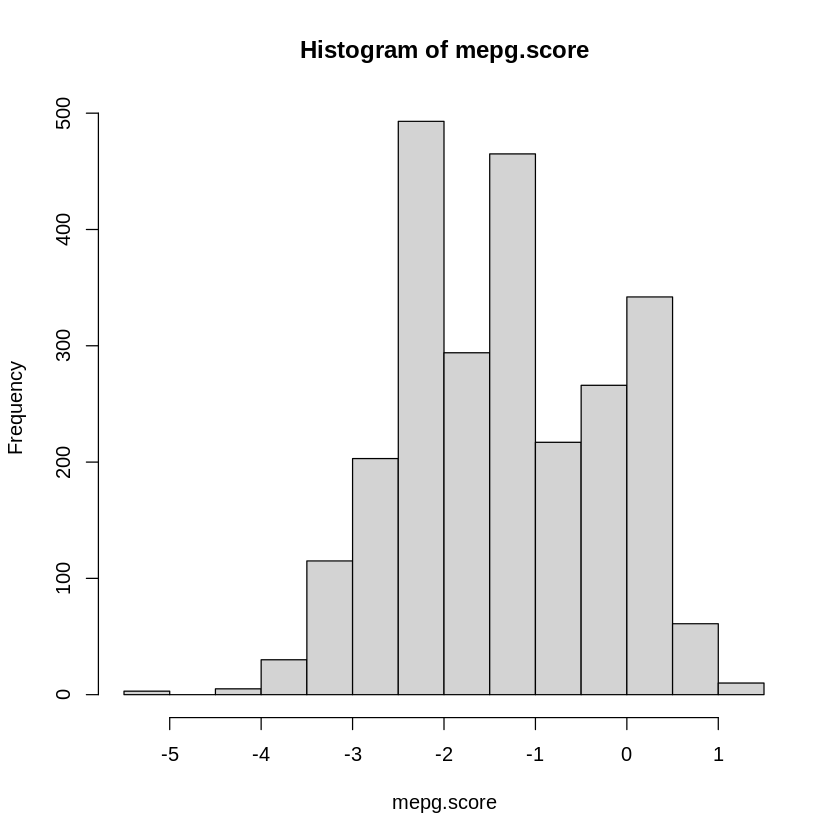

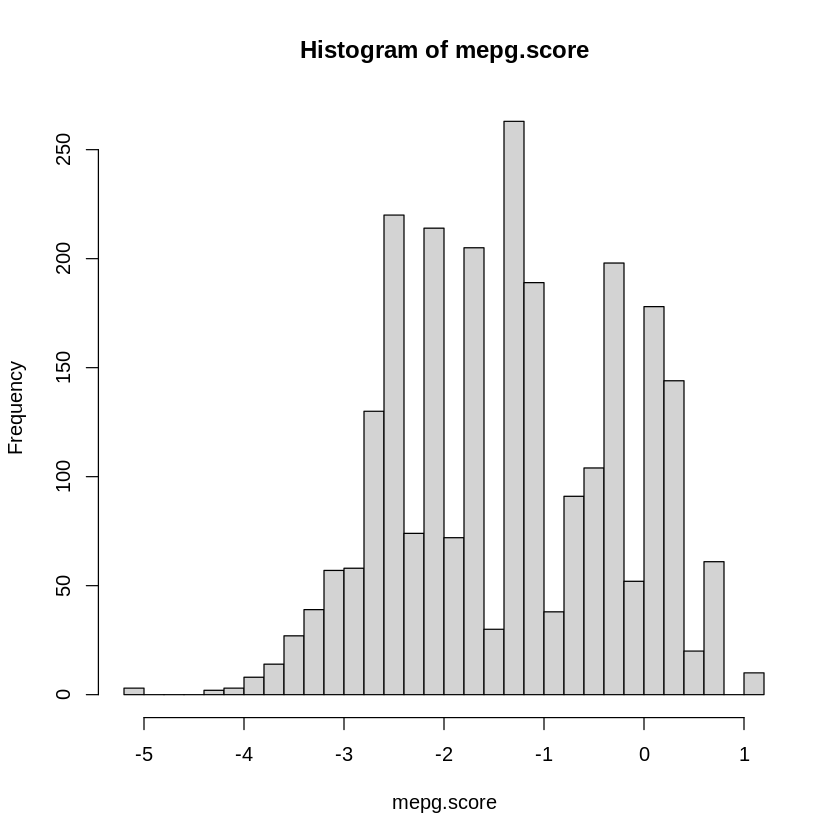

In [ ]:
#@title Distribution of MEP1B score
hist(mepg.score)
hist(mepg.score, breaks = 40)
#The MEP1B score deviates markedly from the normal assumption.

In [ ]:
# use this tab and try to solve the task by youself

**Exercise 4:** CAD score
- Combine the information of the genotype matrix and the CAD scores using the `merge()` function in R

**Question 4:**
- Are all of the positions used in the CAD score present in the genotype matrix ?
- Is there a perfect match between the effect alleles of the scores and the ones in the genotype matrix ?

In [ ]:
#@title Combine genotypes and CAD scores information
head(cadscore)
head(genos)
cadg=merge(cadscore, genos, by.x="id", by.y="SNP", sort = F)
nrow(cadg)

,chr_name,chr_position,effect_allele,effect_weight,id_alleles,id
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,1023851,A,0.0113215,1:959231:G:A,chr1:1023851
2,1,1184478,T,-0.0165875,1:1119858:C:T,chr1:1184478
3,1,1186644,C,0.0135431,1:1122024:T:C,chr1:1186644
4,1,1219478,T,-0.0243073,1:1154858:C:T,chr1:1219478
5,1,1236037,T,-0.0126844,1:1171417:C:T,chr1:1236037
6,1,1274972,G,-0.0193357,1:1210352:A:G,chr1:1274972


,CHR,SNP,X.C.M,POS,COUNTED,ALT,HG00096_HG00096,HG00097_HG00097,HG00099_HG00099,HG00100_HG00100,⋯,NA21128_NA21128,NA21129_NA21129,NA21130_NA21130,NA21133_NA21133,NA21135_NA21135,NA21137_NA21137,NA21141_NA21141,NA21142_NA21142,NA21143_NA21143,NA21144_NA21144
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,chr1:1023851,0,1023851,A,G,0,1,2,1,⋯,1,2,1,0,0,0,2,1,1,0
2,1,chr1:1184478,0,1184478,T,C,0,0,0,0,⋯,0,1,0,0,1,0,1,1,1,0
3,1,chr1:1186644,0,1186644,C,T,0,0,0,0,⋯,1,0,2,1,0,1,1,1,1,0
4,1,chr1:1219478,0,1219478,T,C,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,1,chr1:1236037,0,1236037,C,T,1,1,2,1,⋯,1,0,0,0,1,1,0,0,0,1
6,1,chr1:1274972,0,1274972,G,A,0,0,0,0,⋯,0,1,1,1,0,1,1,2,2,0


[1] 74913

In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title Answer question 4
dim(cadscore)
dim(cadg)
#All of the variants used for the CAD score are not present in the genotype matrix

all(cadg$effect_allele == cadg$COUNTED)
head(cadg[,c("id", "effect_allele", "effect_weight", "COUNTED", "ALT")])
#Even when the positions are present, the alleles can be different. For example, the effect allele for position 1:1236037 in the score is T whil it is C in the genotype data
#We will have to solve this issue before applying the CAD score

[1] 75001     6

[1] 74913  2515

[1] FALSE

,id,effect_allele,effect_weight,COUNTED,ALT
,<chr>,<chr>,<dbl>,<chr>,<chr>
1,chr1:1023851,A,0.0113215,A,G
2,chr1:1184478,T,-0.0165875,T,C
3,chr1:1186644,C,0.0135431,C,T
4,chr1:1219478,T,-0.0243073,T,C
5,chr1:1236037,T,-0.0126844,C,T
6,chr1:1274972,G,-0.0193357,G,A


In [ ]:
# use this tab and try to solve the task by youself

**Exercise 5:** Apply the CAD score:
- If the effect alleles are not the same for the score and the genotype matrix, you need to flip the effect (= change sign of effect)
- Compute CAD score for each individual by applying an element-wise multiplication column by column as before
- Create a data frame `cadg.mepg.scores` with the following columns: `id`, `CAD.manual` and `MEP1B.manual`. It will be used later to compare the results with the ones from the `plink` software.

**Question 5:** What do you think about the distribution of the CAD score ?

In [ ]:
#@title Apply the CAD score
# If the effect allele is the ALT allele, inverse the effect
cadg[which(cadg$ALT == cadg$effect_allele), "effect_weight"] <- -cadg[which(cadg$ALT == cadg$effect_allele), "effect_weight"]
head(cadg)
#Compute the score
cadg.score <- colSums(apply(cadg[,spnames], 2, function(x) x*cadg$effect_weight), na.rm = TRUE)

,id,chr_name,chr_position,effect_allele,effect_weight,id_alleles,CHR,X.C.M,POS,COUNTED,⋯,NA21128_NA21128,NA21129_NA21129,NA21130_NA21130,NA21133_NA21133,NA21135_NA21135,NA21137_NA21137,NA21141_NA21141,NA21142_NA21142,NA21143_NA21143,NA21144_NA21144
,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,chr1:1023851,1,1023851,A,0.0113215,1:959231:G:A,1,0,1023851,A,⋯,1,2,1,0,0,0,2,1,1,0
2,chr1:1184478,1,1184478,T,-0.0165875,1:1119858:C:T,1,0,1184478,T,⋯,0,1,0,0,1,0,1,1,1,0
3,chr1:1186644,1,1186644,C,0.0135431,1:1122024:T:C,1,0,1186644,C,⋯,1,0,2,1,0,1,1,1,1,0
4,chr1:1219478,1,1219478,T,-0.0243073,1:1154858:C:T,1,0,1219478,T,⋯,0,0,0,0,0,0,0,0,0,0
5,chr1:1236037,1,1236037,T,0.0126844,1:1171417:C:T,1,0,1236037,C,⋯,1,0,0,0,1,1,0,0,0,1
6,chr1:1274972,1,1274972,G,-0.0193357,1:1210352:A:G,1,0,1274972,G,⋯,0,1,1,1,0,1,1,2,2,0


In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title Combine the results
cadg.mepg.scores <- data.frame(id=names(cadg.score), CAD.manual=cadg.score)
cadg.mepg.scores$MEP1B.manual <- data.frame(id=names(mepg.score), MEP1B.manual=mepg.score)[cadg.mepg.scores$id, "MEP1B.manual"]
head(cadg.mepg.scores)


,id,CAD.manual,MEP1B.manual
,<chr>,<dbl>,<dbl>
HG00096_HG00096,HG00096_HG00096,5.499265,-1.8107488
HG00097_HG00097,HG00097_HG00097,5.716100,-2.4174872
HG00099_HG00099,HG00099_HG00099,9.140899,-2.0063286
HG00100_HG00100,HG00100_HG00100,7.858507,-0.2488646
HG00101_HG00101,HG00101_HG00101,9.590015,-2.6559537
HG00102_HG00102,HG00102_HG00102,3.223081,-0.7406358


In [ ]:
# use this tab and try to solve the task by youself

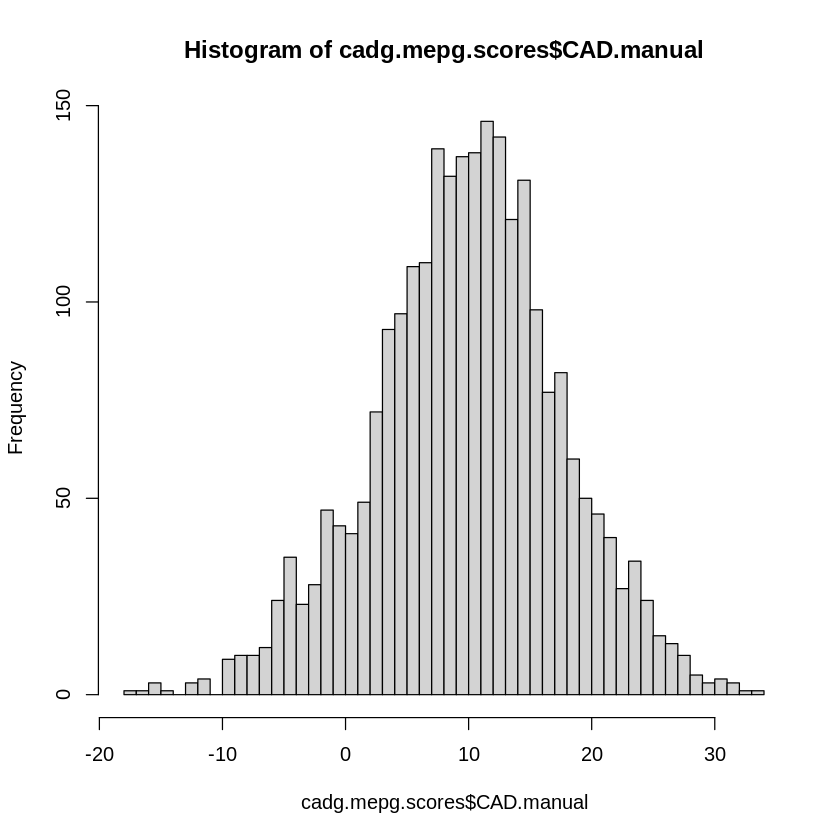

In [ ]:
#@title Answer question 5
hist(cadg.mepg.scores$CAD.manual, breaks = 40)
#The CAD score is normally distributed, which is expected from a PGS of a highly polygenic trait

In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title **Optional** Alternative using the data.table library
#MEP1B
mepg=genos[SNP %in% mepscore$id]
mepg
mepg.score=colSums(mepg[,lapply(.SD, function(x) x*mepscore$effect), .SDcol=spnames])
#CAD
cadg[,eff:=effect_weight]
cadg[effect_allele==ALT,eff:=-1*eff]
cadg=cadg[effect_allele==ALT | effect_allele == COUNTED]
cadg=cadg[,lapply(.SD, function(x) sum(x*eff, na.rm=T)), .SDcol=spnames]

In [ ]:
rm(genos)  # to free up memory space
gc()  # to free up memory space

# Method 2: Applying scores using Plink
We will now use the plink software to compute the scores. To have more information on how to proceed, use:
`cat(system('./plink --help', intern=T), sep="\n")`

**Exercise 6:**
- Apply the scores to `autosomal.forPRS` using `CAD.score` and `MET1B.score`
- Import the results `CAD.profile` and `MEP1B.profile` to `R`
- Merge all the scores with the previous dataframe
- Compute the correlations between the scores computed in `R` or in `plink` for CAD and MEP1B

**Question 6:** You should observe some differences for CAD, where do you think they come from ?

In [ ]:
#@title Apply the scores using plink
cat(system('./plink --bfile autosomal.forPRS --score CAD.score --out CAD', intern=T), sep="\n")
cat(system('./plink --bfile autosomal.forPRS --score MEP1B.score --out MEP1B', intern=T), sep="\n")

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to CAD.log.
Options in effect:
  --bfile autosomal.forPRS
  --out CAD
  --score CAD.score

12982 MB RAM detected; reserving 6491 MB for main workspace.
75624 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to CAD.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2504 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%57%58%59%60%61%62%63%64%65%

In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title Import the computed scores and combine with R-made scores
cadsc = read.table("CAD.profile", header = TRUE)
mepsc = read.table("MEP1B.profile", header = TRUE)
head(cadsc) ; head(mepsc)
cadsc$id <- paste0(cadsc$FID, "_", cadsc$IID)
mepsc$id <- paste0(mepsc$FID, "_", mepsc$IID)
allscores=merge(cadg.mepg.scores, cadsc[,c("id", "SCORE")], by="id", sort = FALSE)
colnames(allscores)[4] <- "CAD.Plink"
allscores=merge(allscores, mepsc[,c("id", "SCORE")], by="id")
colnames(allscores)[5] <- "MEP1B.Plink"
dim(allscores)
head(allscores)

,FID,IID,PHENO,CNT,CNT2,SCORE
,<chr>,<chr>,<int>,<int>,<int>,<dbl>
1,HG00096,HG00096,-9,149594,50507,5.05267e-05
2,HG00097,HG00097,-9,149596,50713,5.33455e-05
3,HG00099,HG00099,-9,149600,50789,7.68214e-05
4,HG00100,HG00100,-9,149604,50777,6.79659e-05
5,HG00101,HG00101,-9,149604,50428,7.87867e-05
6,HG00102,HG00102,-9,149606,50549,3.60922e-05


,FID,IID,PHENO,CNT,CNT2,SCORE
,<chr>,<chr>,<int>,<int>,<int>,<dbl>
1,HG00096,HG00096,-9,14,3,-0.1293390
2,HG00097,HG00097,-9,14,6,-0.1726780
3,HG00099,HG00099,-9,14,3,-0.1433090
4,HG00100,HG00100,-9,14,3,-0.0177760
5,HG00101,HG00101,-9,14,5,-0.1897110
6,HG00102,HG00102,-9,14,2,-0.0529026


[1] 2504    5

,id,CAD.manual,MEP1B.manual,CAD.Plink,MEP1B.Plink
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,HG00096_HG00096,5.499265,-1.8107488,5.05267e-05,-0.1293390
2,HG00097_HG00097,5.716100,-2.4174872,5.33455e-05,-0.1726780
3,HG00099_HG00099,9.140899,-2.0063286,7.68214e-05,-0.1433090
4,HG00100_HG00100,7.858507,-0.2488646,6.79659e-05,-0.0177760
5,HG00101_HG00101,9.590015,-2.6559537,7.87867e-05,-0.1897110
6,HG00102_HG00102,3.223081,-0.7406358,3.60922e-05,-0.0529026


In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title Correlation between the scores
cor(allscores[,-1])

,CAD.manual,MEP1B.manual,CAD.Plink,MEP1B.Plink
CAD.manual,1.00000000,-0.01538893,0.99988250,-0.01538887
MEP1B.manual,-0.01538893,1.00000000,-0.01772568,1.00000000
CAD.Plink,0.99988250,-0.01772568,1.00000000,-0.01772562
MEP1B.Plink,-0.01538887,1.00000000,-0.01772562,1.00000000


In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title Question 6

#We see a slight discrepancy between the manual and Plink-generated CAD scores.
#This is likely due to our imperfect allele matching, PLINK is more conservative as it only keeps variants where effect alleles concord.

In [ ]:
# use this tab and try to solve the task by youself

# Predictive accuracy of MEP1B levels and CAD events
We will now look at the predictive accuracy of the two scores by looking at the actual phenotypes of individuals for those two traits. This information is available for a cohort of 1000 individuals representing a subset of the 1000 Genomes project.

**Exercise 7**:
- Load the CAD (https://www.dropbox.com/s/xs7wsgij95w2uau/CAD.phenotype?dl=1) and MEP1B phenotypes (https://www.dropbox.com/s/5rmhjmv0d6oqxpr/MEP1B.phenotype?dl=1).
- Import the data in `R` and add the phenotype to the files gathering all scores
- Plot the plink scores against the true phenotypes. Hint: think about which kind of plot to use according to the data type you have (i.e. continous or discrete)
- Compute the Pearson's correlation for MEP1B
- Get the top and bottom deciles of the distribution for CAD using the function `quantiles()`.
- Compute the odds ratio for people in the top vs bottom deciles of the distribution for CAD. Remember that $OR=Odds_{Q2}/Odds_{Q1}$ with $Odds_{Q1}=P(Case/Q1)/P(Control/Q1)$

**Question 7:** What can you say about the predictive accuracy of both scores?

In [ ]:
#@title Download phenotypes and import in R
rCAD=read.table("https://www.dropbox.com/s/xs7wsgij95w2uau/CAD.phenotype?dl=1")
rMEP=read.table("https://www.dropbox.com/s/5rmhjmv0d6oqxpr/MEP1B.phenotype?dl=1")
colnames(rCAD) <- c("id", "CADpheno")
colnames(rMEP) <- c("id", "MEP1Bpheno")
allscores.pheno=merge(allscores, rCAD, by="id")
allscores.pheno=merge(allscores.pheno, rMEP, by="id")
head(allscores.pheno)
dim(allscores.pheno)

,id,CAD.manual,MEP1B.manual,CAD.Plink,MEP1B.Plink,CADpheno,MEP1Bpheno
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,HG00100_HG00100,7.858507,-0.2488646,6.79659e-05,-0.0177760,0,0.8043038
2,HG00101_HG00101,9.590015,-2.6559537,7.87867e-05,-0.1897110,0,0.2982448
3,HG00107_HG00107,1.228113,-1.9660223,2.38842e-05,-0.1404300,0,-0.3710304
4,HG00110_HG00110,14.434249,-3.3537028,1.10964e-04,-0.2395500,0,-2.0066681
5,HG00113_HG00113,5.287770,-1.1627703,5.11322e-05,-0.0830550,1,1.9434506
6,HG00114_HG00114,-7.204362,-1.0047261,-3.23207e-05,-0.0717662,0,0.5865678


[1] 1000    7

In [ ]:
# use this tab and try to solve the task by youself

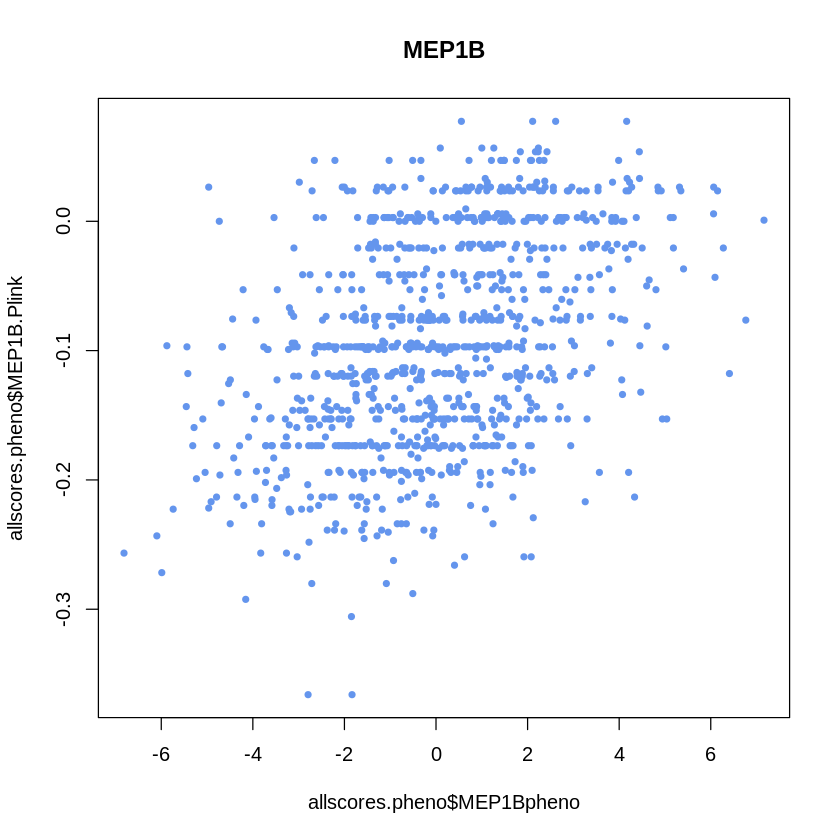

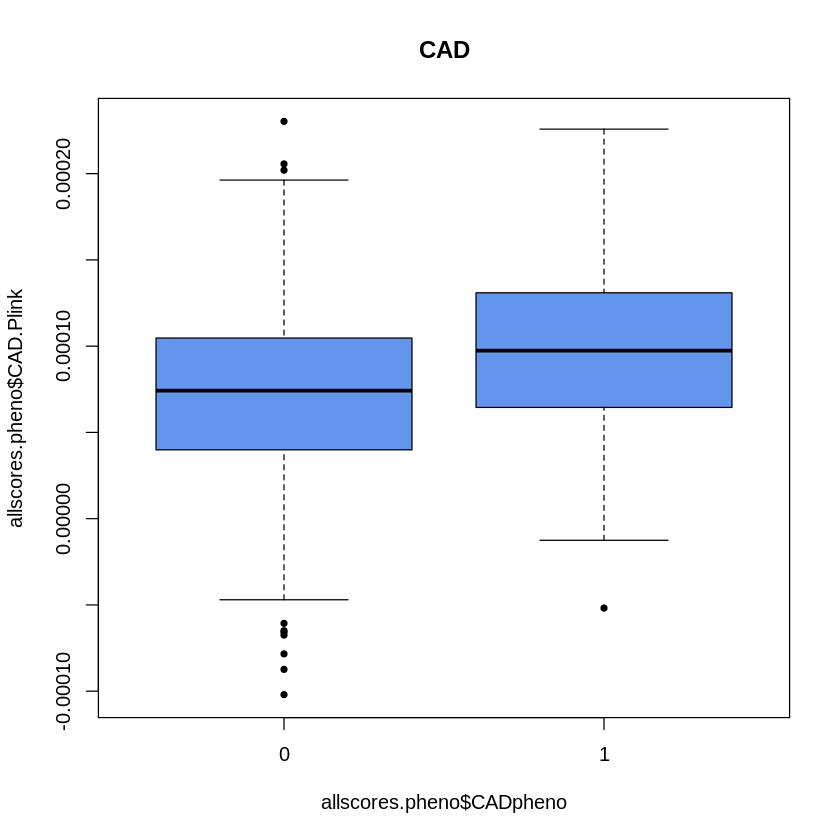

In [ ]:
#@title Graphical representations
plot(allscores.pheno$MEP1Bpheno, allscores.pheno$MEP1B.Plink, col="cornflowerblue", pch=20, main = "MEP1B")
boxplot(allscores.pheno$CAD.Plink ~ allscores.pheno$CADpheno, col="cornflowerblue", pch=20, main = "CAD")

In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title Correlation for MEP1B score
cor(allscores.pheno$MEP1Bpheno, allscores.pheno$MEP1B.Plink)

[1] 0.4273652

In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title Calculate the top and bottom deciles of the distribution for CAD
cadq=quantile(allscores.pheno$CAD.Plink, c(0.1, 0.9))
cadq

10%          90% 
1.546558e-05 1.427608e-04

In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title OR CAD
#Compute the Odds for bottom decile
Q1=table(allscores.pheno[which(allscores.pheno$CAD.Plink<cadq[1]),]$CADpheno)
Q1
OddsQ1 = Q1[2]/Q1[1]

#Compute the Odds for top decile
Q2=table(allscores.pheno[which(allscores.pheno$CAD.Plink>cadq[2]),]$CADpheno)
Q2
OddsQ2 = Q2[2]/Q2[1]

#Compute the odds ratio
OR=OddsQ2/OddsQ1
OR


 0  1 
85 15 


 0  1 
45 55 

1 
6.925926

In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title Question 7
# The correlation for MEP1B is quite low, highlighting a moderate prediction value of this score.
# The CAD OR is high, highlighting the fact that the predictive value of the corresponding score is good.

In [ ]:
# use this tab and try to solve the task by youself

# **PRS and Polygenicity**
Until now, we have applied two genetic risk scores and examined how well they predict actual phenotypes. We will now examine what these scores can tell us about the genetic architecture of these traits.

**Question 8**: How many variants are present in each score (see `Question 1`)? Does that correspond to what you know of the genetic architecture of both traits?

In [ ]:
#@title Question 8
nrow(cadscore)
nrow(mepscore)
#Yes. MEP1B is a protein trait, it is expected to be much less polygenic than CAD which is a complex trait.

[1] 75001

[1] 7

In [ ]:
# use this tab and try to solve the task by youself

# Bonus exercise: lifting over the polygenic score
We have worked in this exercise with a CAD score that was obtained after a liftover. The original CAD score was downloaded from the publicly available PGS catalog. Variants in that score are identified by chromosome:position, but are on build 37 (also called hg19) of the human reference genome. Our genetic data is on build 38, and we must therefore first map these coordinates onto that build to apply the PGS to the genetic data. That process is called a liftover. We have provided you the score in the right build for the previous exercise but in this optional exercise, we give you the possibility to perform the liftover yourself.
There are R libraries that can do this, but they come from the Bioconductor project, and are clunky and hard to use. We will use an external program called CrossMap.


**Step 1**:
Download the dictionary of positions from build 37 to 38 from the USCS Liftover FTP Website: https://hgdownload.cse.ucsc.edu/goldenpath/hg19/liftOver/hg19ToHg38.over.chain.gz

In [ ]:
#@title Downloading the data
cat(system('
(rm *.chain.gz || echo downloading) && wget https://hgdownload.cse.ucsc.edu/goldenpath/hg19/liftOver/hg19ToHg38.over.chain.gz 2>&1
', intern=T), sep="\n")

In [ ]:
# use this tab and try to solve the task by youself

**Step 2:** Install CrossMap using `pip3 install` and look at the help page

In [ ]:
#@title Install CrossMap
cat(system('pip3 install CrossMap', intern=T), sep="\n")
cat(system('CrossMap.py --help 2>&1', intern=T), sep="\n")

In [ ]:
# use this tab and try to solve the task by youself

As you can see, CrossMap supports multiple input formats. We are going to use `bed` as it is the easiest to use. This format is composed of 3 mandatory, tab-separated columns, and an arbitrary number of columns afterwards. The 3 columns are `chr`, `pos-1`, `pos`. We say that the second column is '0-based' while the third one is '1-based'.

**Step 3**:
- Download the CAD score from https://ftp.ebi.ac.uk/pub/databases/spot/pgs/scores/PGS000337/ScoringFiles/PGS000337.txt.gz
- Read it in R
- Make it compatible with the BED format.
- Export the file to `cad.bed` (without the column names)

In [ ]:
#@title Download the score and make a bed file
cat(system('wget https://ftp.ebi.ac.uk/pub/databases/spot/pgs/scores/PGS000337/ScoringFiles/PGS000337.txt.gz', intern=T), sep="\n")
cadscore = read.table(gzfile("PGS000337.txt.gz"), header = TRUE)
cadscore$start <- cadscore$chr_position-1
cadscore <- cadscore[,c("chr_name", "start", "chr_position", "effect_allele", "effect_weight", "variant_description")]
write.table(cadscore, "cad.bed", col.names = F, row.names = F, quote = F, sep = "\t")

head(cadscore)

In [ ]:
# use this tab and try to solve the task by youself

**Step 4**: Use CrossMap bed to convert the positions in the CAD score from build 37 to build 38.

In [ ]:
#@title Convert the positions
cat(system('CrossMap.py bed hg19ToHg38.over.chain.gz cad.bed cad.38.bed 2>&1', intern=T), sep="\n")

In [ ]:
# use this tab and try to solve the task by youself

**Step 5**:
- Read in the lifted over file
- Remove the second column (pos - 1),
- Remove any position that maps outside of the autosomes (chr1-chr22),
- Check that no variant maps to several positions on build 38.

In [ ]:
#@title Import the lifted positions and keep only autosomes
liftedover = read.table("cad.38.bed")
colnames(liftedover) <- colnames(cadscore)
liftedover = liftedover[,-which(colnames(liftedover) == "start")]
dim(liftedover)
#Remove the positions not mapping to chromosomes 1 to 22
liftedover <- subset(liftedover, chr_name %in% 1:22)
dim(liftedover)

In [ ]:
# use this tab and try to solve the task by youself

In [ ]:
#@title Do variants map to several positions ?
nb.positions <- table(liftedover$variant_description)
head(nb.positions)
table(nb.positions)
#All of the variants map only to one position --> ok

In [ ]:
# use this tab and try to solve the task by youself

**Step 6**: Create a tab-separated, headerless score file for your lifted over CAD score, with the following columns :

*   `id` which has the form chr1:1234
*   `effect_allele`
*   `effect_weight`

Export the file to `CAD.score`. This file corresponds to what we used in the first part of this workshop.

In [ ]:
#@title Create the final file
cadscore=liftedover
cadscore$id = paste0(cadscore$chr_name, ":", cadscore$chr_position)
write.table(cadscore[,c("id", "effect_allele", "effect_weight")], "CAD.score", sep ="\t", col.names = F, row.names = F, quote = F)
write.table(cadscore, "CAD.score", sep ="\t", col.names = F, row.names = F, quote = F)

In [ ]:
# use this tab and try to solve the task by youself